In [1]:
import scipy
import sys
import numpy as np
sys.path.append('/home/clarkmaio/workspace/slurp/')
import matplotlib.pyplot as plt
from slurp.src.scipy import l, f, cc, s, GnAM

# Demo splines

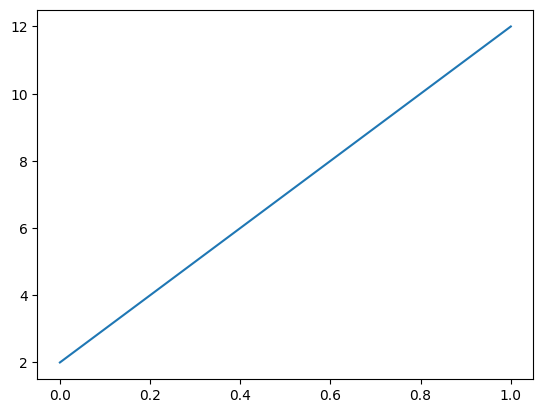

In [2]:
x = np.linspace(0, 1, 100)
spline = l(bias=True)
y = spline(params=[10,2], x=x)

plt.plot(x, y)

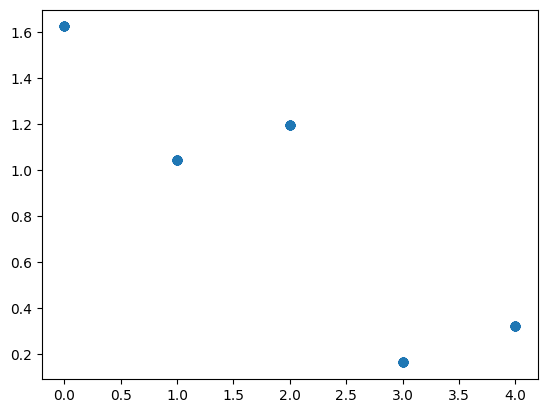

In [3]:
x = np.random.randint(0, 5, 100)
spline = f(n_class=5)
y = spline(params=np.random.randn(5), x=x)

plt.scatter(x, y)

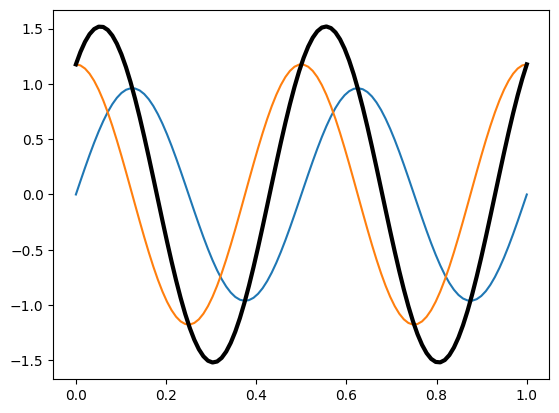

In [4]:
x = np.linspace(0, 1, 100)
order = 1
spline = cc(order=order, period = .5, bias=False)
p = np.random.randn(2*order )
y = spline(params=p, x=x)
yc = spline.components(params=p, x=x)

plt.plot(x, yc)
plt.plot(x, y, color='k', linewidth=3)

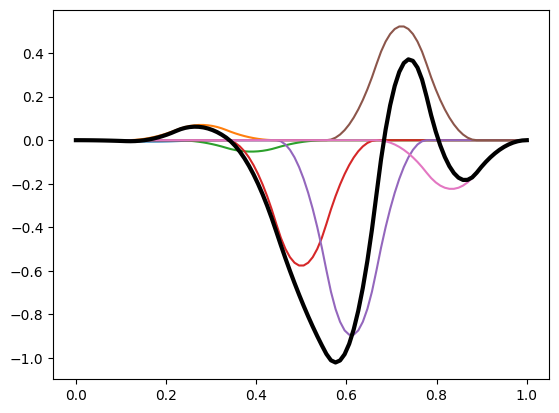

In [5]:
x = np.linspace(0, 1, 100)
knots, degree = 10, 2
p = np.random.randn(knots-degree-1)
spline = s(knots = np.linspace(0, 1, knots), degree=degree)
yb = spline.basis(x=x, degree = degree)
y = spline(params=p, x=x)


plt.plot(x, spline.components(params=p, x=x))
plt.plot(x, y, color='k', linewidth=3)

# Demo GnAM

In [6]:
xx = np.linspace(0, 10, 1000)
yy = 1 + 2*np.sin(xx) + xx + np.random.randn(1000)


class mymodel(GnAM):

    def spline_catalog(self):
        return {
            'l': l(bias=True),
            'cc': cc(order=1, period=2*np.pi, bias=False)
        }

    def design(self, params, *args):
        params_catalog = self.split_params(params)
        return (
            self.spline_catalog()['cc'](params=params_catalog['cc'], x=args[0]) 
            + self.spline_catalog()['l'](params=params_catalog['l'], x=args[0])
        )
    

mm = mymodel()
mm.fit(yy, xx)
yyhat = mm.predict(xx)

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 1.0115580246980018
        x: [ 9.809e-01  1.094e+00  2.077e+00 -3.859e-02]
      nit: 10
      jac: [-2.923e-06 -1.872e-07  1.590e-07  5.752e-08]
     nfev: 13
     njev: 13
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>


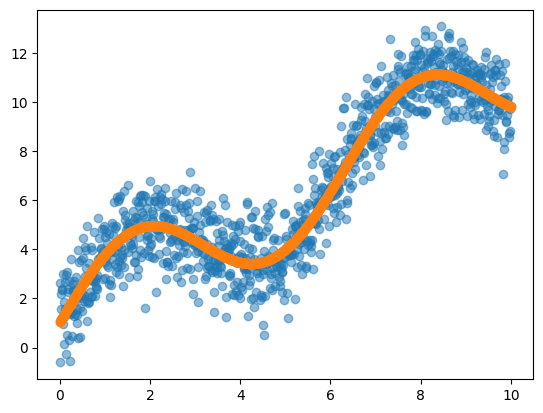

In [7]:
plt.scatter(xx, yy, alpha=.5)
plt.scatter(xx, yyhat)